# Pair Correlation

Given coordinates of particles in an image, find the average pair correlation (essentially the average number of particles a distance r to r + dr away from any refernce particle).

Do this by counting the number of particles that are a given distance away from a reference particle and repeat for all particles in the image. Then find the area within each radial bin and divide the number of particles that were counted in each bin by the total area to find the average particle density (the pair correlation, g(r))

In [31]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Calculates the area in each radial bin between each bin edge given the x and y dimensions of the image and the coordinates of the point of reference:

In [4]:
def areaCircularBins2(ximgDim, yimgDim, xcoord, ycoord, binedges):
    # ximgDim: the width of the rectangular image area
    # yimgDim: the height of the rectangular image area
    # xcoord: the x-coordinate of the reference particle
    # ycoord: the y-coordinate of the reference particle
    # binedges: a numpy array of bin edges secifying the range of radial distances 
    # over which to count the number of particles and to find and sum the area 
    
    numbins = len(binedges)-1
    Totarea = np.zeros(numbins)
    

    for j in range(1, numbins + 1):
        rsmall = binedges[j - 1]
        rbig = binedges[j]

        xL = xcoord
        yB = yimgDim - ycoord
        xR = ximgDim - xcoord
        yT = ycoord

        area1tot = 0

        if xL**2 + yB**2 > rsmall**2:
            area1small = np.pi * rsmall**2 / 4

            if xL < rsmall:
                area1small += (xL * np.sqrt(rsmall**2 - xL**2) - rsmall**2 * np.arccos(xL / rsmall)) / 2

            if yB < rsmall:
                area1small += (yB * np.sqrt(rsmall**2 - yB**2) - rsmall**2 * np.arccos(yB / rsmall)) / 2
        else:
            area1small = xL * yB

        area1big = 0

        if xL**2 + yB**2 > rbig**2:
            area1big = np.pi * rbig**2 / 4

            if xL < rbig:
                area1big += (xL * np.sqrt(rbig**2 - xL**2) - rbig**2 * np.arccos(xL / rbig)) / 2

            if yB < rbig:
                area1big += (yB * np.sqrt(rbig**2 - yB**2) - rbig**2 * np.arccos(yB / rbig)) / 2
        else:
            area1big = xL * yB

        area1tot = area1big - area1small

        area2tot = 0

        if xL**2 + yT**2 > rsmall**2:
            area2small = np.pi * rsmall**2 / 4

            if xL < rsmall:
                area2small += (xL * np.sqrt(rsmall**2 - xL**2) - rsmall**2 * np.arccos(xL / rsmall)) / 2

            if yT < rsmall:
                area2small += (yT * np.sqrt(rsmall**2 - yT**2) - rsmall**2 * np.arccos(yT / rsmall)) / 2
        else:
            area2small = xL * yT

        area2big = 0

        if xL**2 + yT**2 > rbig**2:
            area2big = np.pi * rbig**2 / 4

            if xL < rbig:
                area2big += (xL * np.sqrt(rbig**2 - xL**2) - rbig**2 * np.arccos(xL / rbig)) / 2

            if yT < rbig:
                area2big += (yT * np.sqrt(rbig**2 - yT**2) - rbig**2 * np.arccos(yT / rbig)) / 2
        else:
            area2big = xL * yT

        area2tot = area2big - area2small

        area3tot = 0

        if xR**2 + yT**2 > rsmall**2:
            area3small = np.pi * rsmall**2 / 4

            if xR < rsmall:
                area3small += (xR * np.sqrt(rsmall**2 - xR**2) - rsmall**2 * np.arccos(xR / rsmall)) / 2

            if yT < rsmall:
                area3small += (yT * np.sqrt(rsmall**2 - yT**2) - rsmall**2 * np.arccos(yT / rsmall)) / 2
        else:
            area3small = xR * yT

        area3big = 0

        if xR**2 + yT**2 > rbig**2:
            area3big = np.pi * rbig**2 / 4

            if xR < rbig:
                area3big += (xR * np.sqrt(rbig**2 - xR**2) - rbig**2 * np.arccos(xR / rbig)) / 2

            if yT < rbig:
                area3big += (yT * np.sqrt(rbig**2 - yT**2) - rbig**2 * np.arccos(yT / rbig)) / 2
        else:
            area3big = xR * yT

        area3tot = area3big - area3small

        area4tot = 0

        if xR**2 + yB**2 > rsmall**2:
            area4small = np.pi * rsmall**2 / 4

            if xR < rsmall:
                area4small += (xR * np.sqrt(rsmall**2 - xR**2) - rsmall**2 * np.arccos(xR / rsmall)) / 2

            if yB < rsmall:
                area4small += (yB * np.sqrt(rsmall**2 - yB**2) - rsmall**2 * np.arccos(yB / rsmall)) / 2
        else:
            area4small = xR * yB

        area4big = 0

        if xR**2 + yB**2 > rbig**2:
            area4big = np.pi * rbig**2 / 4

            if xR < rbig:
                area4big += (xR * np.sqrt(rbig**2 - xR**2) - rbig**2 * np.arccos(xR / rbig)) / 2

            if yB < rbig:
                area4big += (yB * np.sqrt(rbig**2 - yB**2) - rbig**2 * np.arccos(yB / rbig)) / 2
        else:
            area4big = xR * yB

        area4tot = area4big - area4small

        Totarea[j - 1] = Totarea[j - 1] + area1tot + area2tot + area3tot + area4tot

    return Totarea

Finds the average pair correlation: 

In [15]:
def pairCorrelation(ximgDim, yimgDim, xcoords, ycoords, binedges):
# xcoords: numpy array of x-coordinates of all the particles in the image
# ycoords: numpy array of y-coordinates of all the particles in the image
# ximgDim: the width of the rectangular image area
# yimgDim: the height of the rectangular image area
# binedges: a numpy array of bin edges secifying the range of radial distances 

    numpart = len(xcoords)

    TotareaSum = np.zeros(len(binedges)-1)
    for jj in range(numpart):
        TotareaSum = TotareaSum + areaCircularBins2(ximgDim, yimgDim,xcoords[jj],ycoords[jj],binedges)

    xmat = xcoords
    xmat = np.repeat(xmat,numpart)
    xmat1 = np.transpose(np.reshape(xmat,[numpart,numpart]))
    xmat2 = np.reshape(xmat,[numpart,numpart])
    xmatDiff = xmat1 - xmat2

    ymat = ycoords
    ymat = np.repeat(ymat,numpart)
    ymat1 = np.transpose(np.reshape(ymat,[numpart,numpart]))
    ymat2 = np.reshape(ymat,[numpart,numpart])
    ymatDiff = ymat1 - ymat2
    distMat = np.sqrt(xmatDiff**2+ymatDiff**2)

    histDist = np.histogram(distMat,binedges)

    counts = histDist[0]

    particleDensity = counts/TotareaSum

    bincenters = (binedges[0:-1] + binedges[1:len(binedges)])/2

    particleDensityErr = np.sqrt(counts/2)/(TotareaSum/2) #divide by 2 because all distances and areas were double counted
    
    return [particleDensity,particleDensityErr,bincenters]

### Example:

In [6]:
import random

In [26]:
xcoords = np.zeros(200)
ycoords = np.zeros(200)
for j in range(200):
    xcoords[j] = random.uniform(0, 2448)
    ycoords[j] = random.uniform(0, 2048)

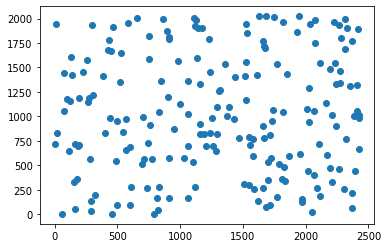

In [27]:
plt.scatter(xcoords,ycoords,marker='o')

In [28]:
binedgesum = np.arange(0.1,429,5)
binedgespx = binedgesum/(0.67/5)

In [29]:
[particleDensity,particleDensityErr,bincenters] = pairCorrelation(2448, 2048, xcoords, ycoords, binedgespx)

In [18]:
from matplotlib.ticker import ScalarFormatter

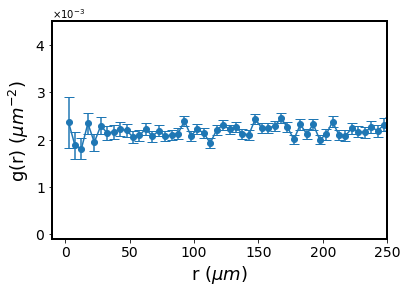

In [33]:
bincentersum = bincenters*(0.67/5)
particleDensityum = particleDensity/((0.67/5)**2)
particleDensityErrum = particleDensityErr/((0.67/5)**2) # example of converting from pixels to microns

plt.errorbar(bincentersum,particleDensityum, yerr=particleDensityErrum,marker='o', linestyle='-', capsize=5)
plt.xlabel(r'r $(\mu m)$', fontsize=18)
plt.ylabel(r'g(r) $(\mu m^{-2})$',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.xlim([-10,250])
plt.ylim([-0.1*10**(-3),4.5*10**(-3)])

# Use ScalarFormatter for the x-axis ticks with custom formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))  # Adjust the limits to control when to use "10^x" notation
plt.gca().yaxis.set_major_formatter(formatter)

# Adjust the thickness of the frame
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the linewidth to your desired thickness

plt.show()